#### Nama  : Rehana Putri Salsabilla
#### NRP   : 5027221015
#### Kelas : AI B

# 1. Memuat Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv('data_nasabah.csv')
data

,ID_Nasabah,Usia_Nasabah,Jenis_Kelamin,Jumlah_Tanggungan,Tingkat_Pendidikan,Status_Pernikahan,Pendapatan,Kategori_Kartu,Lama_Menjadi_Nasabah,Jumlah_Layanan,Limit_Kredit,Saldo_Revolting_Total,Total_Transaksi,Jumlah_Melakukan_Transaksi,Rasio_Penggunaan_Rata-rata
0,717574683,53.0,Perempuan,3,NaN,Menikah,44280.0,Biru,46,6,2192.0,1146,4756,85,0.523
1,769662033,45.0,Perempuan,2,Kuliah,NaN,9982.0,Biru,29,2,1438.3,0,5025,85,0.000
2,719377383,40.0,Laki-Laki,2,Kuliah,Belum Menikah,64988.0,Biru,28,1,10880.0,2025,4957,90,0.186
3,820657083,53.0,Laki-Laki,4,Kuliah,Belum Menikah,117549.0,Perak,48,5,34516.0,800,3819,72,0.023
4,709836258,45.0,Perempuan,4,Sarjana,Menikah,21579.0,Biru,41,5,1927.0,1337,5127,81,0.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,768390708,47.0,Laki-Laki,2,NaN,Belum Menikah,85551.0,Biru,41,6,2877.0,1136,4006,68,0.395
1046,807990108,44.0,Laki-Laki,1,Tidak Berpendidikan,Bercerai,143802.0,Biru,39,3,11362.0,0,3197,61,0.000
1047,711023508,55.0,Perempuan,1,Sarjana,Menikah,NaN,Biru,43,5,3161.0,1389,1547,30,0.439
1048,826783233,57.0,Perempuan,3,SMA,Belum Menikah,25111.0,Biru,53,1,3029.0,2214,4750,89,0.731


## 2. Pemeriksaan Dataset

In [ ]:
# Menampilkan lima baris pertama data dalam format tabel
display(data.head())


,ID_Nasabah,Usia_Nasabah,Jenis_Kelamin,Jumlah_Tanggungan,Tingkat_Pendidikan,Status_Pernikahan,Pendapatan,Kategori_Kartu,Lama_Menjadi_Nasabah,Jumlah_Layanan,Limit_Kredit,Saldo_Revolting_Total,Total_Transaksi,Jumlah_Melakukan_Transaksi,Rasio_Penggunaan_Rata-rata
0,717574683,53.0,Perempuan,3,NaN,Menikah,44280.0,Biru,46,6,2192.0,1146,4756,85,0.523
1,769662033,45.0,Perempuan,2,Kuliah,NaN,9982.0,Biru,29,2,1438.3,0,5025,85,0.000
2,719377383,40.0,Laki-Laki,2,Kuliah,Belum Menikah,64988.0,Biru,28,1,10880.0,2025,4957,90,0.186
3,820657083,53.0,Laki-Laki,4,Kuliah,Belum Menikah,117549.0,Perak,48,5,34516.0,800,3819,72,0.023
4,709836258,45.0,Perempuan,4,Sarjana,Menikah,21579.0,Biru,41,5,1927.0,1337,5127,81,0.694


In [ ]:
# Melihat info data
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_Nasabah                  1050 non-null   int64  
 1   Usia_Nasabah                1000 non-null   float64
 2   Jenis_Kelamin               1050 non-null   object 
 3   Jumlah_Tanggungan           1050 non-null   int64  
 4   Tingkat_Pendidikan          883 non-null    object 
 5   Status_Pernikahan           976 non-null    object 
 6   Pendapatan                  932 non-null    float64
 7   Kategori_Kartu              1050 non-null   object 
 8   Lama_Menjadi_Nasabah        1050 non-null   int64  
 9   Jumlah_Layanan              1050 non-null   int64  
 10  Limit_Kredit                1050 non-null   float64
 11  Saldo_Revolting_Total       1050 non-null   int64  
 12  Total_Transaksi             1050 non-null   int64  
 13  Jumlah_Melakukan_Transaksi  1050 

None

In [ ]:
# Melihat statistik deskriptif
display(data.describe())

,ID_Nasabah,Usia_Nasabah,Jumlah_Tanggungan,Pendapatan,Lama_Menjadi_Nasabah,Jumlah_Layanan,Limit_Kredit,Saldo_Revolting_Total,Total_Transaksi,Jumlah_Melakukan_Transaksi,Rasio_Penggunaan_Rata-rata
count,1.050000e+03,1000.000000,1050.00000,932.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,7.407498e+08,46.176000,2.34381,59609.144850,36.097143,3.965714,8367.464762,1235.982857,4609.471429,67.786667,0.293375
std,3.804229e+07,7.954892,1.25374,42907.053422,8.156950,1.543388,8568.071306,776.468412,3502.326551,23.190516,0.272499
min,7.081287e+08,26.000000,0.00000,159.000000,13.000000,1.000000,1438.300000,0.000000,933.000000,13.000000,0.000000
25%,7.135474e+08,41.000000,1.00000,26533.500000,32.000000,3.000000,2615.500000,772.250000,2262.000000,51.000000,0.050000
50%,7.180074e+08,46.000000,2.00000,52277.500000,36.000000,4.000000,4704.500000,1358.000000,4070.500000,70.000000,0.215000
75%,7.787832e+08,52.000000,3.00000,81855.250000,41.000000,5.000000,10986.500000,1797.500000,4770.000000,82.000000,0.531750
max,8.282361e+08,65.000000,5.00000,199010.000000,56.000000,6.000000,34516.000000,2517.000000,17995.000000,139.000000,0.962000


# 3. Pemeriksaan Kualitas Data

In [ ]:
# Cek tipe data dari setiap kolom
print(data.dtypes)


ID_Nasabah                      int64
Usia_Nasabah                  float64
Jenis_Kelamin                  object
Jumlah_Tanggungan               int64
Tingkat_Pendidikan             object
Status_Pernikahan              object
Pendapatan                    float64
Kategori_Kartu                 object
Lama_Menjadi_Nasabah            int64
Jumlah_Layanan                  int64
Limit_Kredit                  float64
Saldo_Revolting_Total           int64
Total_Transaksi                 int64
Jumlah_Melakukan_Transaksi      int64
Rasio_Penggunaan_Rata-rata    float64
dtype: object


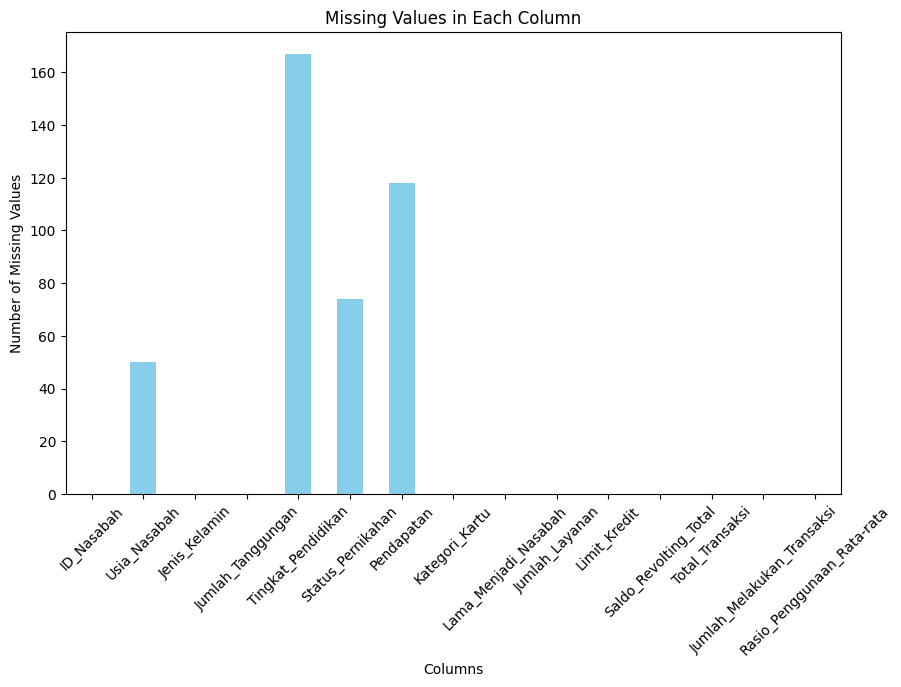

In [ ]:
# Identifikasi missing value
missing_values = data.isnull().sum()

# Visualisasi missing value dengan diagram batang
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

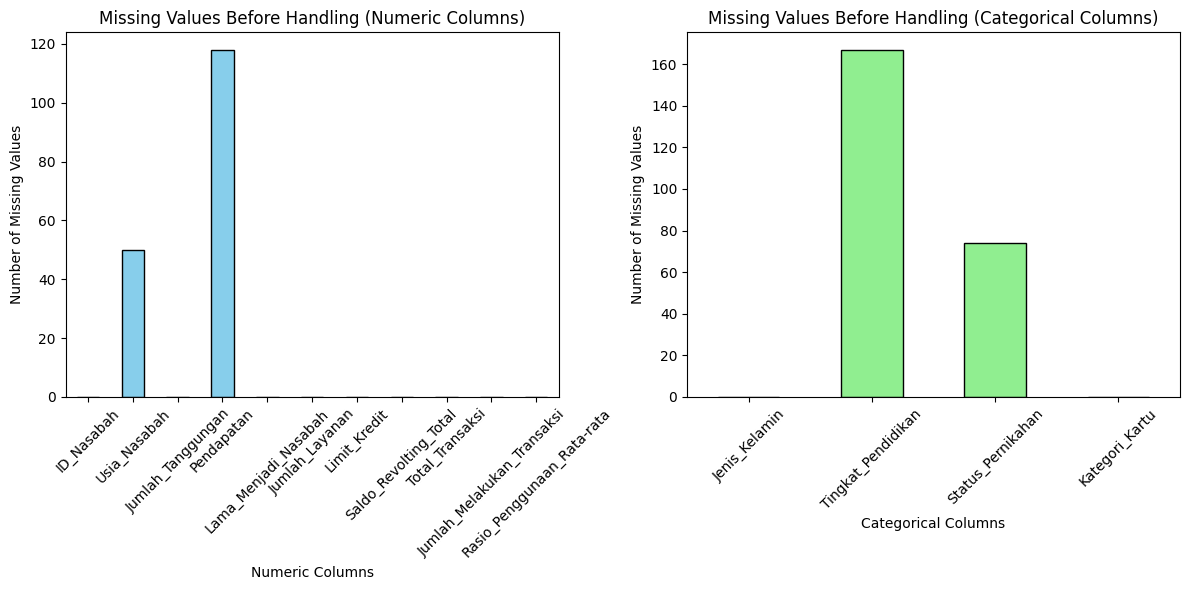

In [ ]:
# Memisahkan kolom-kolom numerik dan kategorikal
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Menghitung jumlah missing values sebelum handling untuk kolom numerik dan kategorikal
missing_values_numeric_before = data[numeric_columns].isnull().sum()
missing_values_categorical_before = data[categorical_columns].isnull().sum()

# Visualisasi missing values sebelum handling untuk kolom numerik
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
missing_values_numeric_before.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Missing Values Before Handling (Numeric Columns)')
plt.xlabel('Numeric Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)

# Visualisasi missing values sebelum handling untuk kolom kategorikal
plt.subplot(1, 2, 2)
missing_values_categorical_before.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Missing Values Before Handling (Categorical Columns)')
plt.xlabel('Categorical Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

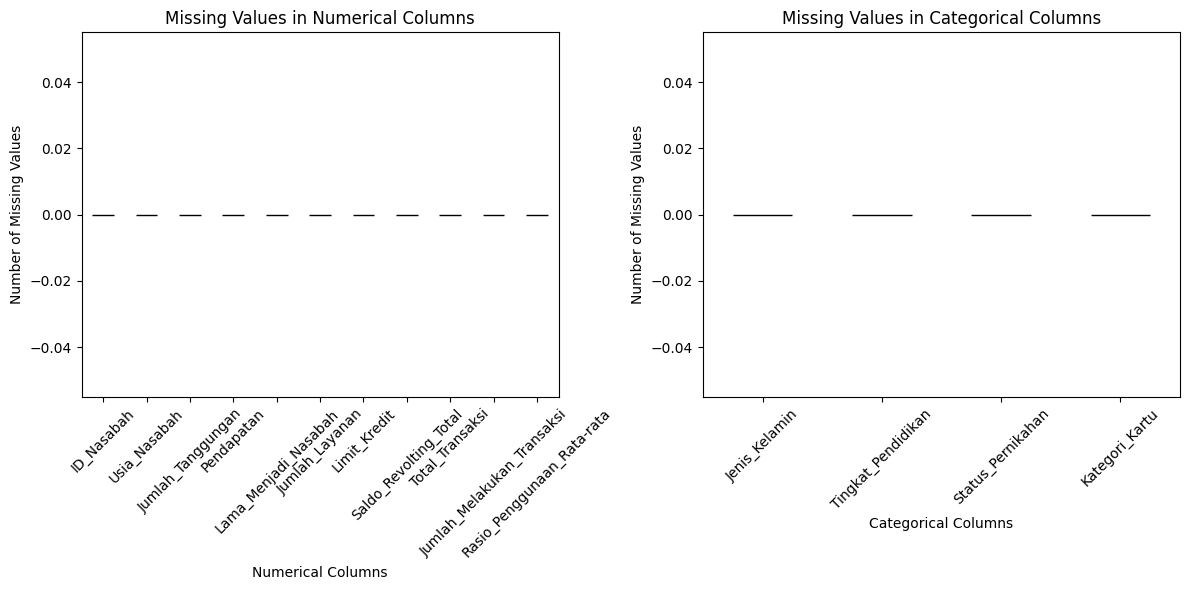

In [ ]:
# Menangani missing value
# Misalnya, mengisi missing value dengan nilai rata-rata atau median untuk kolom numerik
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Misalnya, untuk kolom kategorikal, kita bisa mengisi missing value dengan modus
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

# Menghitung jumlah missing values untuk kolom numerik dan kategorikal
missing_values_numeric = data[numeric_columns].isnull().sum()
missing_values_categorical = data[categorical_columns].isnull().sum()

# Visualisasi missing values untuk kolom numerik
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
missing_values_numeric.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Missing Values in Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)

# Visualisasi missing values untuk kolom kategorikal
plt.subplot(1, 2, 2)
missing_values_categorical.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Missing Values in Categorical Columns')
plt.xlabel('Categorical Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 5. Identifikasi Outlier

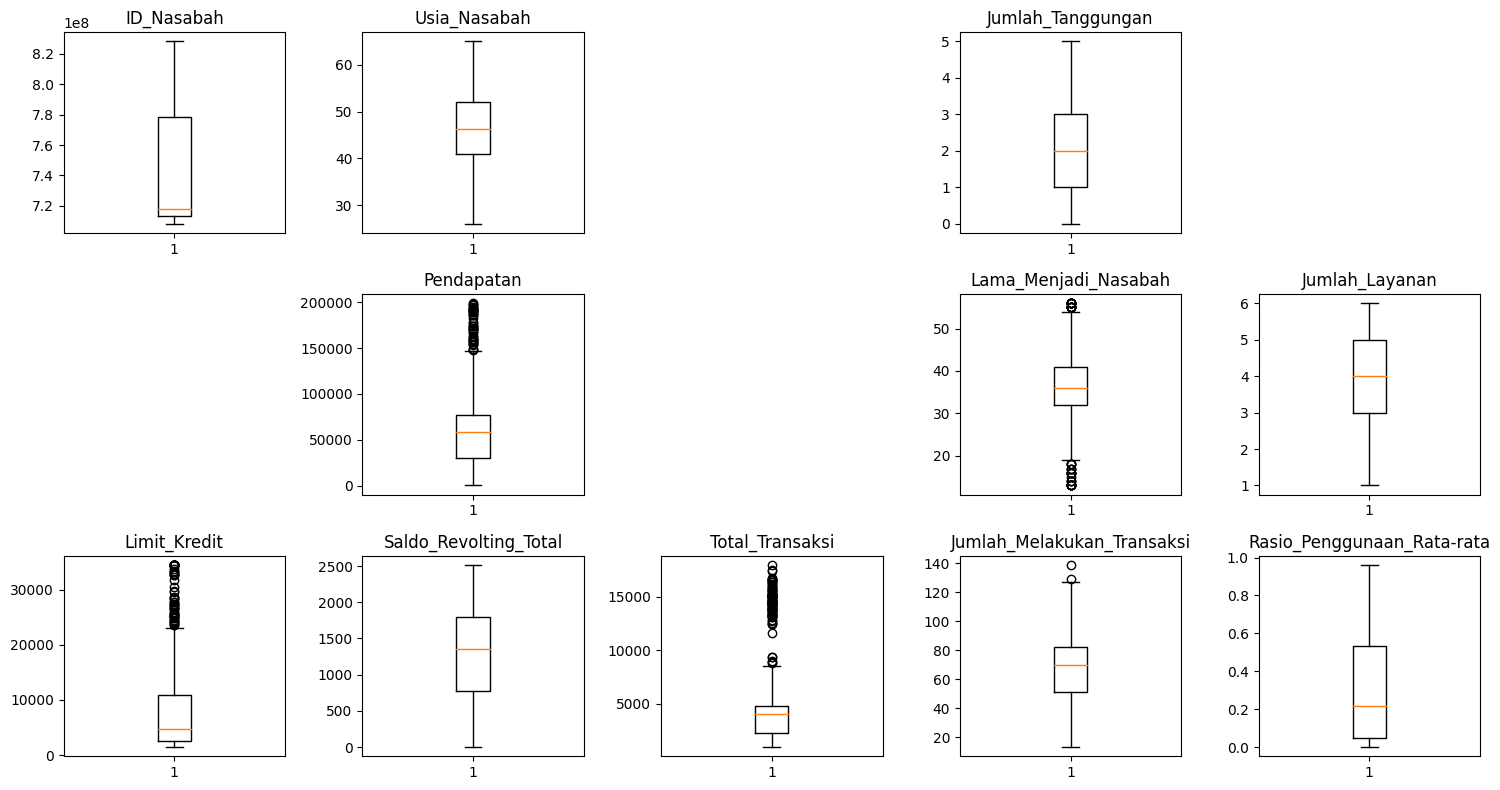

Kolom yang memiliki outlier: ['Pendapatan', 'Lama_Menjadi_Nasabah', 'Limit_Kredit', 'Total_Transaksi', 'Jumlah_Melakukan_Transaksi']


In [ ]:
# Visualisasi boxplot untuk setiap kolom numerik
plt.figure(figsize=(15, 8))
outlier_columns = []
for i, column in enumerate(data.columns):
    if data[column].dtype in ['int64', 'float64']:
        plt.subplot(3, 5, i+1)
        plt.boxplot(data[column])
        plt.title(column)

        # Mengidentifikasi outlier
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
        if not outliers.empty:
            outlier_columns.append(column)

plt.tight_layout()
plt.show()

# Menampilkan kolom yang memiliki outlier
print("Kolom yang memiliki outlier:", outlier_columns)

# 6. Handling Outlier

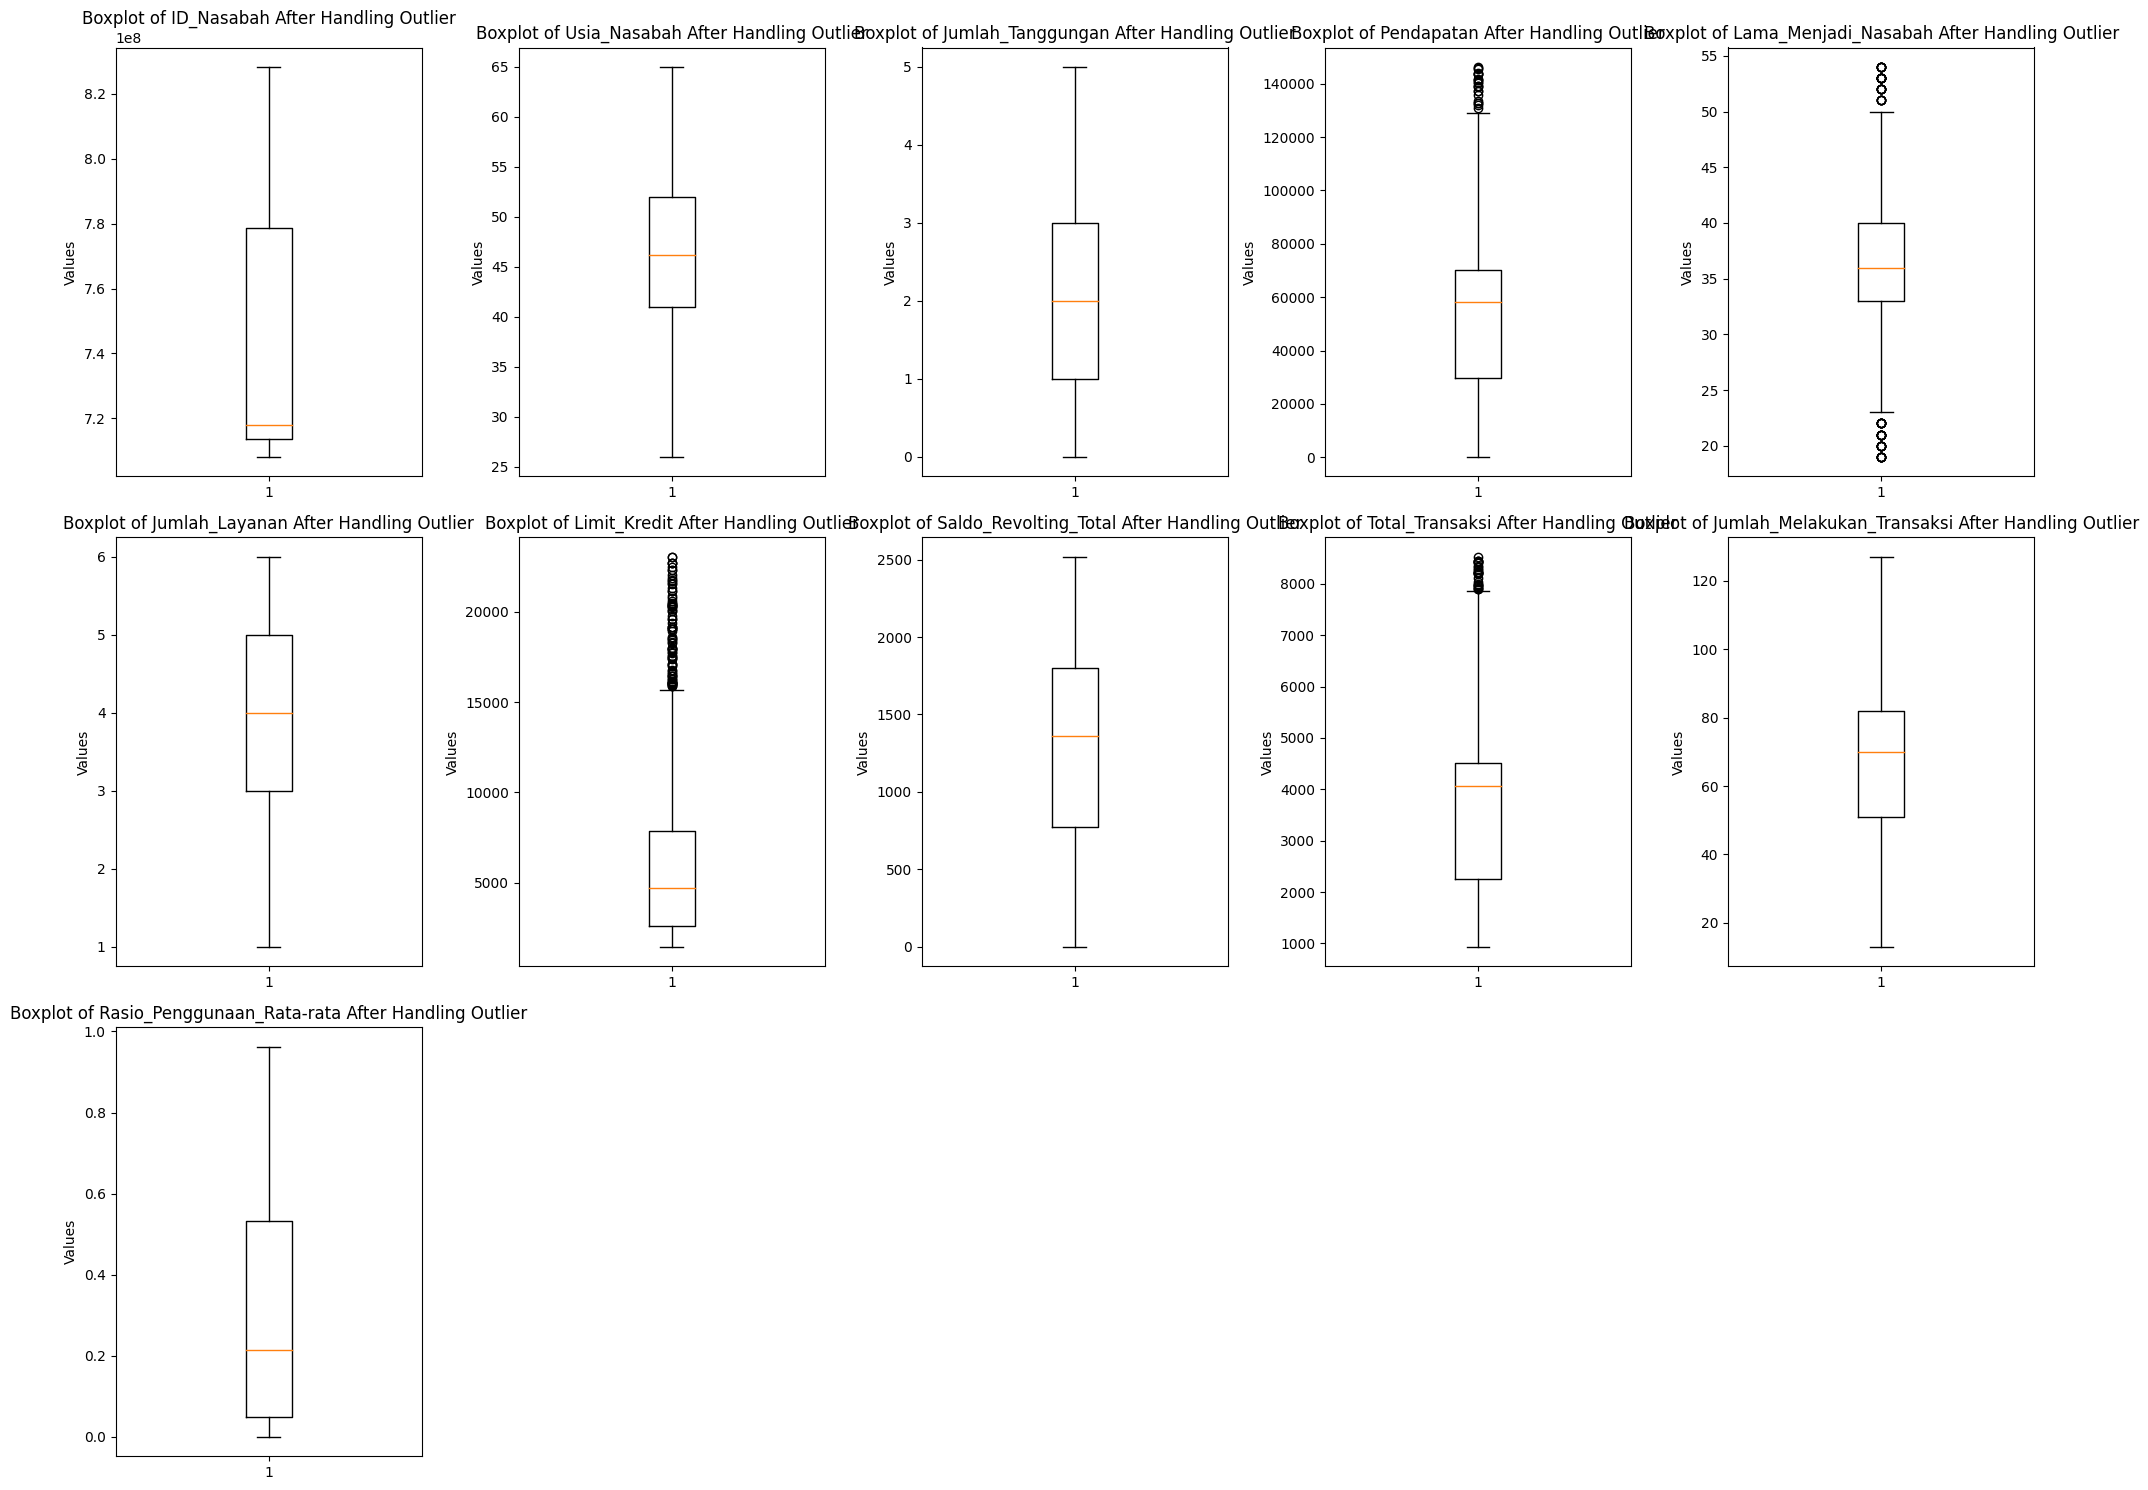

In [ ]:
# Mengidentifikasi kolom-kolom numerik untuk identifikasi outlier
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Handling outlier dengan menggantikan nilai outlier dengan median
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = data[column].apply(lambda x: data[column].median() if x < lower_bound or x > upper_bound else x)

# Visualisasi boxplot setelah handling outlier untuk setiap kolom numerik
num_plots = len(numeric_columns)
num_cols = 5
num_rows = num_plots // num_cols + 1

plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_cols, i+1)
    plt.boxplot(data[column])
    plt.title(f'Boxplot of {column} After Handling Outlier')
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

# 7. Encode

In [ ]:
# Mengidentifikasi kolom-kolom kategorikal
categorical_columns = data.select_dtypes(include=['object']).columns

# Menampilkan nama kolom yang mengandung data kategorikal
print("Kolom-kolom kategorikal:")
for column in categorical_columns:
    print(column)

# Menerapkan label encoding untuk kolom kategorikal
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Menampilkan hasil
print("Data setelah label encoding:")
display(data)

Kolom-kolom kategorikal:
Jenis_Kelamin
Tingkat_Pendidikan
Status_Pernikahan
Kategori_Kartu
Data setelah label encoding:


,ID_Nasabah,Usia_Nasabah,Jenis_Kelamin,Jumlah_Tanggungan,Tingkat_Pendidikan,Status_Pernikahan,Pendapatan,Kategori_Kartu,Lama_Menjadi_Nasabah,Jumlah_Layanan,Limit_Kredit,Saldo_Revolting_Total,Total_Transaksi,Jumlah_Melakukan_Transaksi,Rasio_Penggunaan_Rata-rata
0,717574683,53.0,1,3,4,2,44280.00000,0,46.0,6,2192.0,1146,4756.0,85.0,0.523
1,769662033,45.0,1,2,1,2,9982.00000,0,29.0,2,1438.3,0,5025.0,85.0,0.000
2,719377383,40.0,0,2,1,0,64988.00000,0,28.0,1,10880.0,2025,4957.0,90.0,0.186
3,820657083,53.0,0,4,1,0,117549.00000,2,48.0,5,4704.5,800,3819.0,72.0,0.023
4,709836258,45.0,1,4,4,2,21579.00000,0,41.0,5,1927.0,1337,5127.0,81.0,0.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,768390708,47.0,0,2,4,0,85551.00000,0,41.0,6,2877.0,1136,4006.0,68.0,0.395
1046,807990108,44.0,0,1,5,1,143802.00000,0,39.0,3,11362.0,0,3197.0,61.0,0.000
1047,711023508,55.0,1,1,4,2,59609.14485,0,43.0,5,3161.0,1389,1547.0,30.0,0.439
1048,826783233,57.0,1,3,3,0,25111.00000,0,53.0,1,3029.0,2214,4750.0,89.0,0.731


# 8. Korelasi

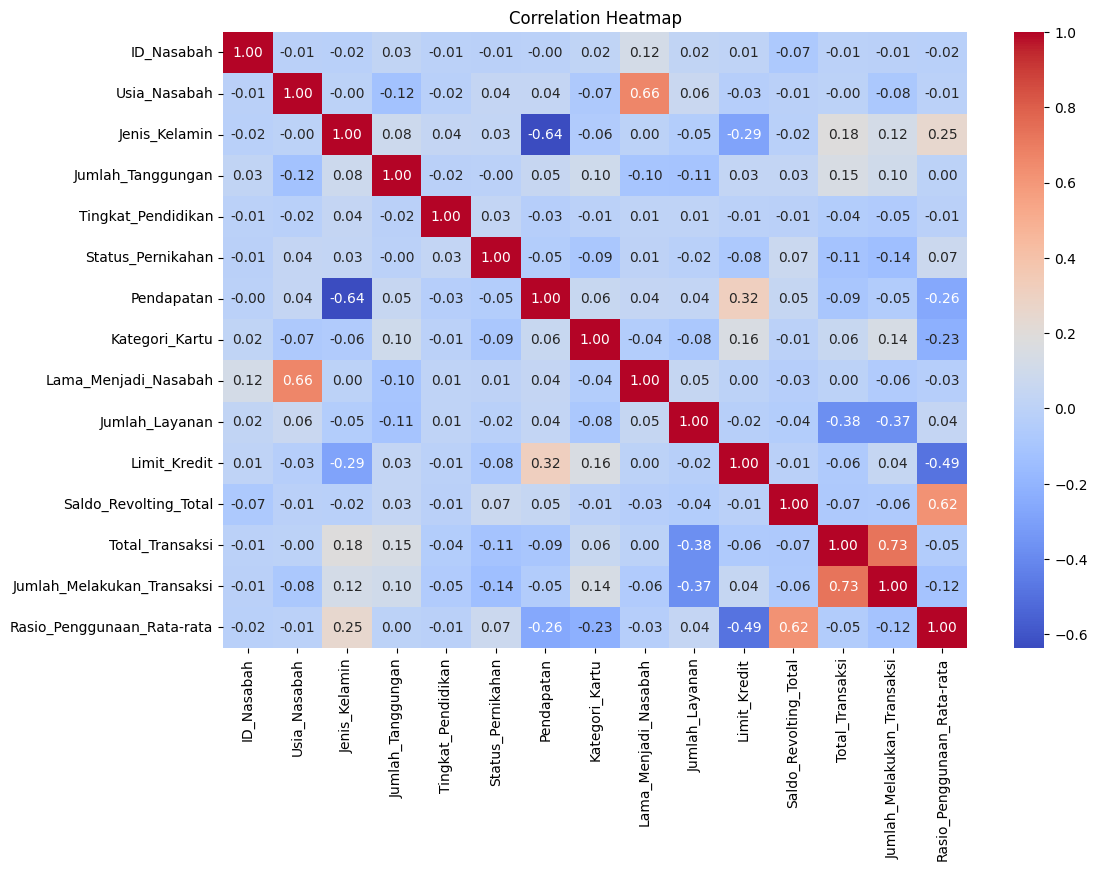

In [ ]:
# Menghitung korelasi antar fitur menggunakan metode korelasi Pearson
correlation_matrix = data.corr()

# Plotting heatmap untuk visualisasi korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 9. Future Selection dan Korelasi

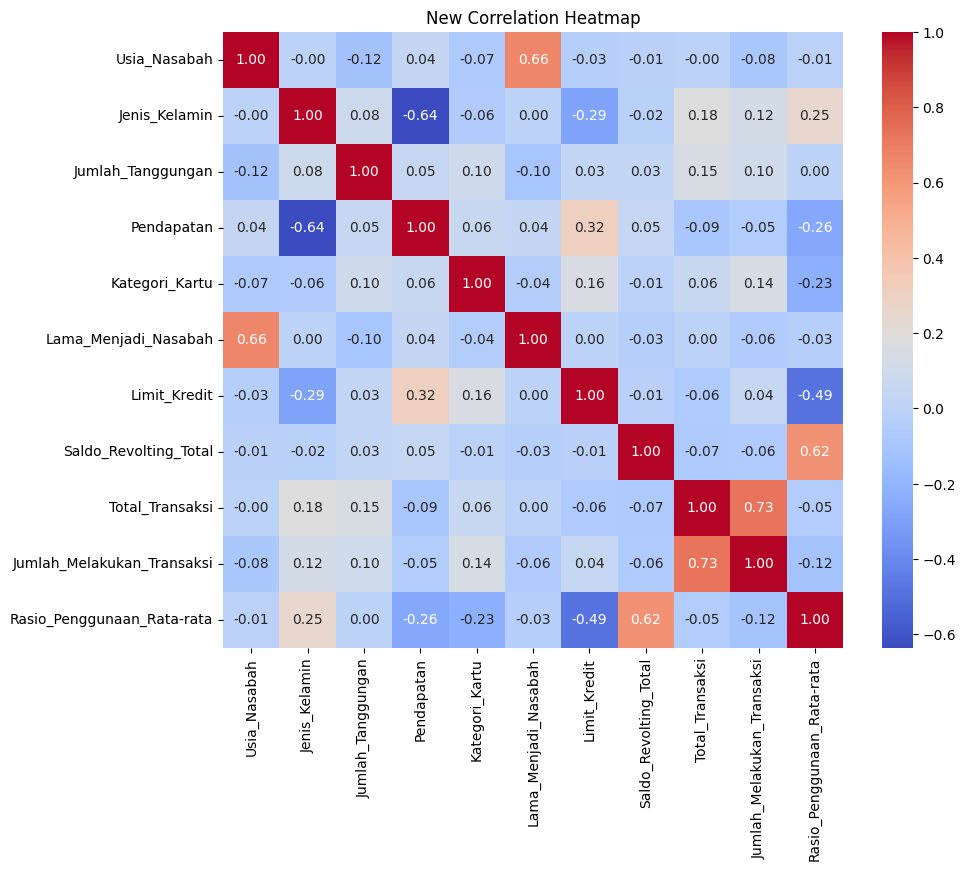

In [ ]:
# Drop kolom dengan korelasi rendah
columns_to_drop = ['Jumlah_Layanan', 'Status_Pernikahan', 'Tingkat_Pendidikan', 'ID_Nasabah']
data_drop_low_corr = data.drop(columns=columns_to_drop)

# Membuat matriks korelasi baru
correlation_matrix_new = data_drop_low_corr.corr()

# Menampilkan heatmap untuk visualisasi korelasi baru
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('New Correlation Heatmap')
plt.show()

# 10. Normalisasi

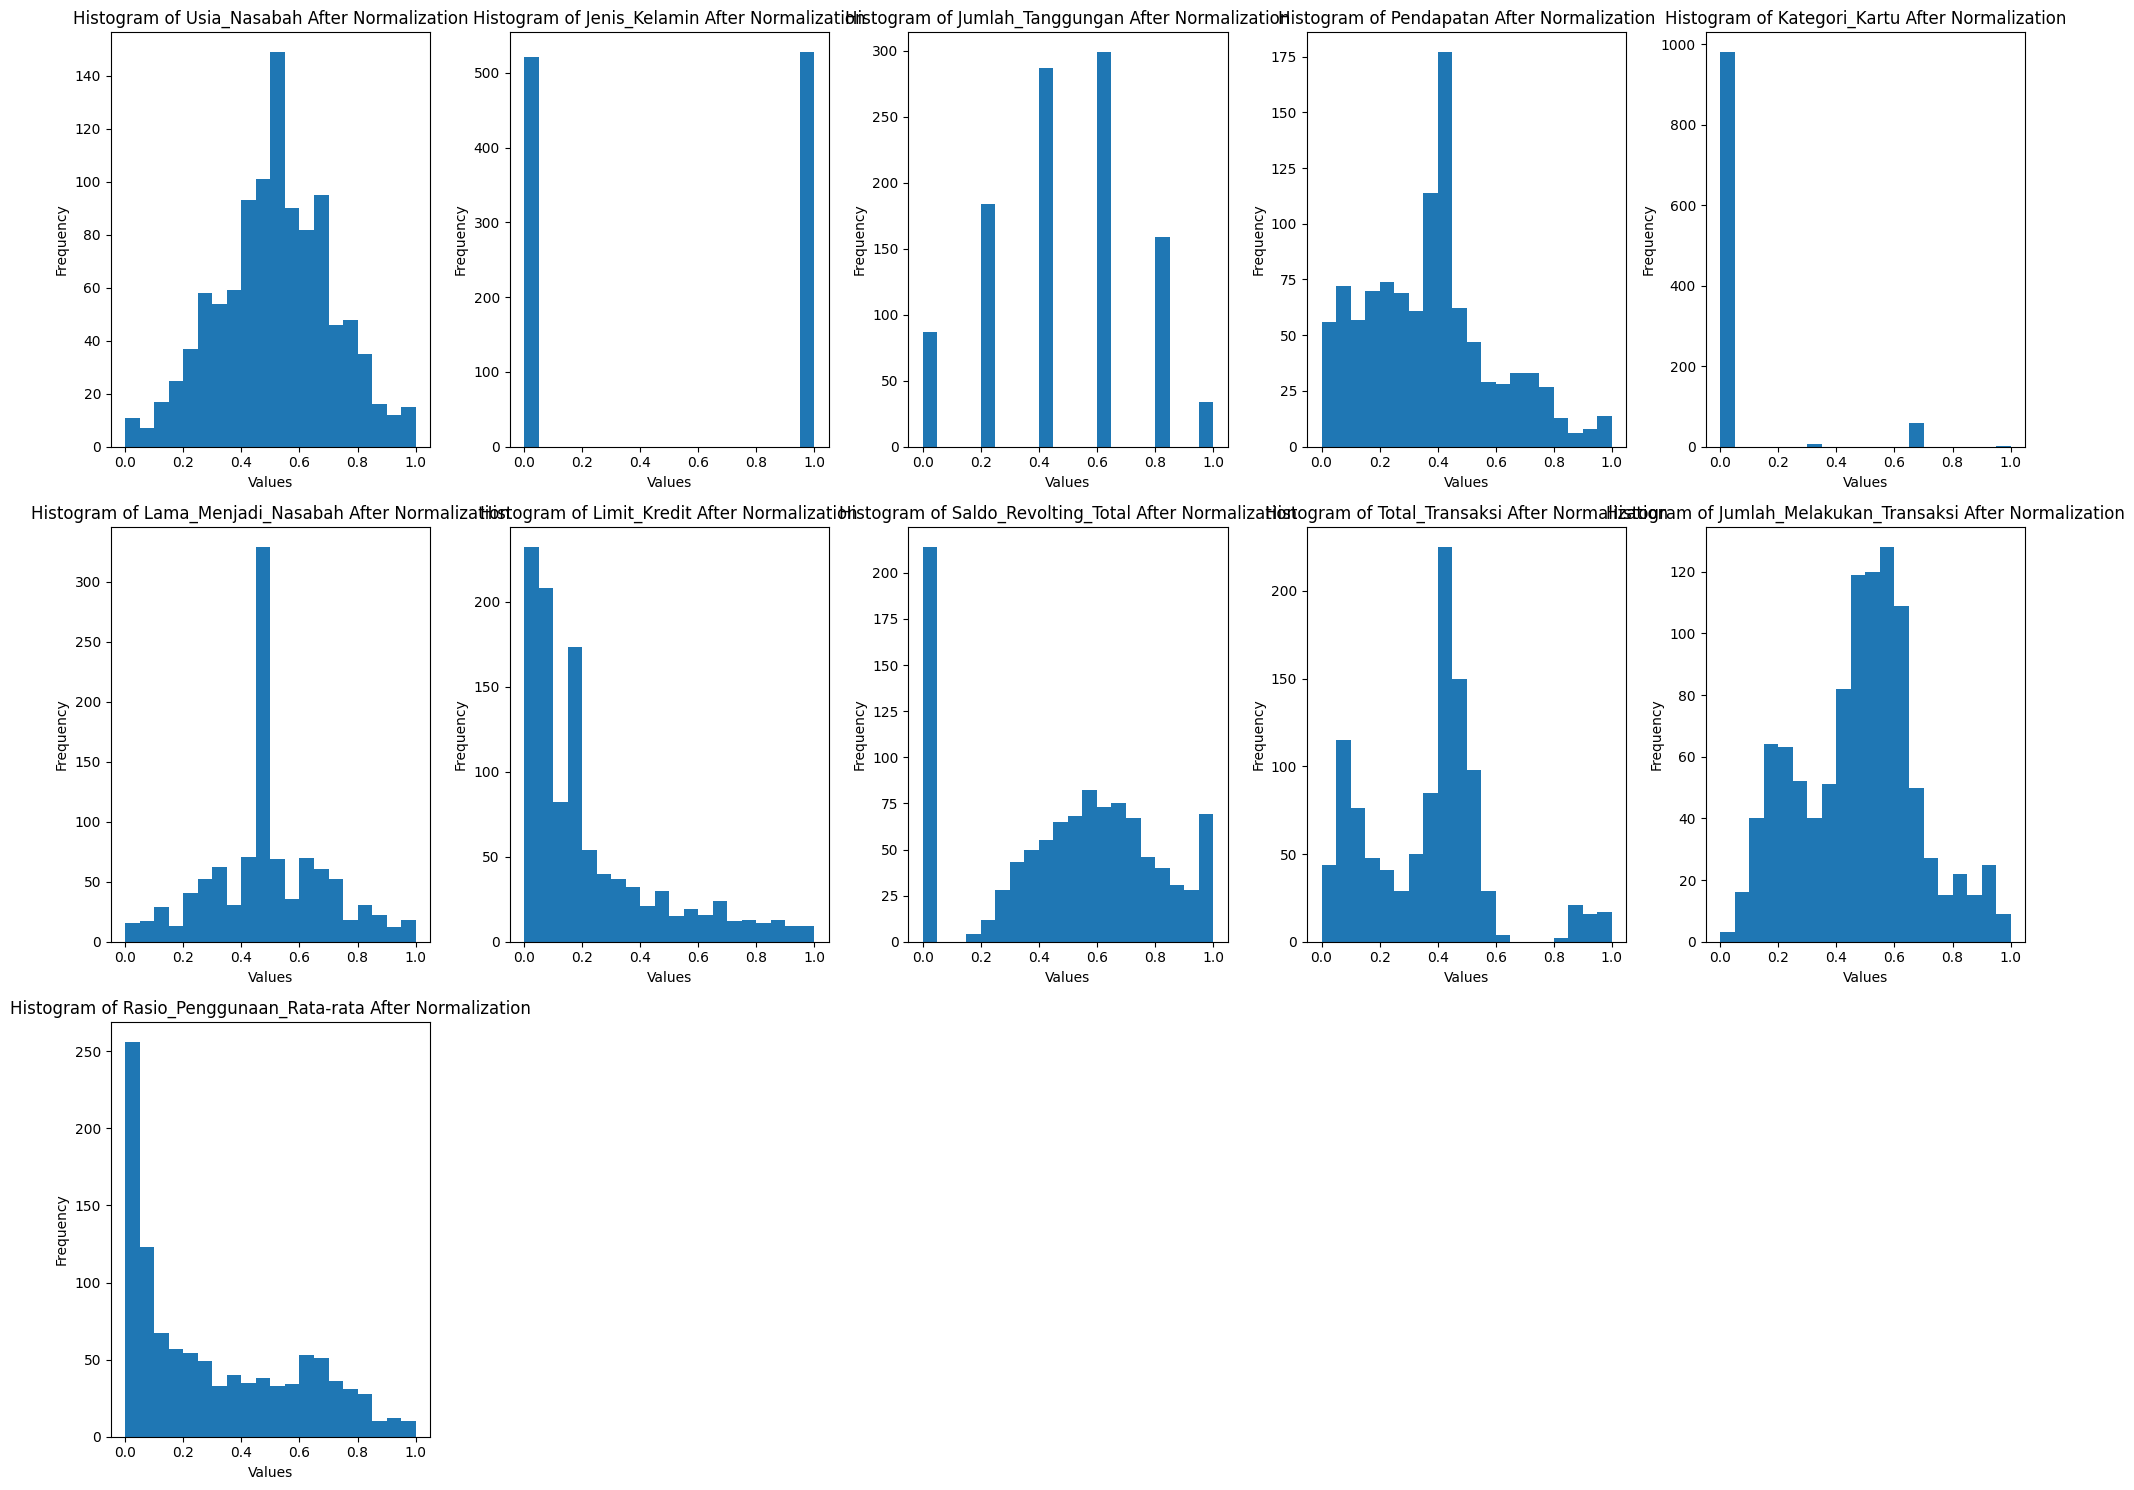

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_drop_low_corr)

# Mengonversi hasil normalisasi menjadi DataFrame
data_normalized_df = pd.DataFrame(data_normalized, columns=data_drop_low_corr.columns)

# Membuat diagram batang untuk setiap kolom setelah normalisasi
num_plots = len(data_normalized_df.columns)
num_cols = 5
num_rows = num_plots // num_cols + 1

plt.figure(figsize=(20, 15))
for i, column in enumerate(data_normalized_df.columns):
    plt.subplot(num_rows, num_cols, i+1)
    plt.hist(data_normalized_df[column], bins=20)
    plt.title(f'Histogram of {column} After Normalization')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 11. Pemilihan Metode Clustering

# PCA

Data PCA:
        PC1       PC2
0 -0.578298  0.016861
1 -0.518938 -0.637747
2  0.505781  0.175805
3  0.637610 -0.250438
4 -0.677082  0.176380


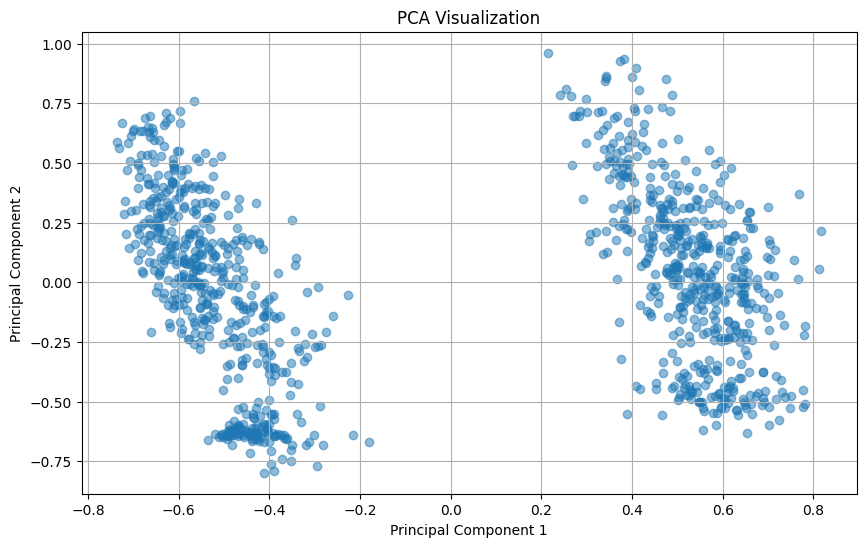

In [ ]:
# Melakukan PCA untuk mengurangi dimensi menjadi 2
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_normalized)

# Mengonversi hasil PCA menjadi DataFrame
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])

# Menampilkan beberapa baris pertama dari data PCA
print("Data PCA:")
print(data_pca_df.head())

# Membuat plot untuk visualisasi hasil PCA
plt.figure(figsize=(10, 6))
plt.scatter(data_pca_df['PC1'], data_pca_df['PC2'], alpha=0.5)
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Elbow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Jumlah Cluster: 1, Inertia: 455.18154470190973
Jumlah Cluster: 2, Inertia: 160.94515904916653
Jumlah Cluster: 3, Inertia: 101.26339615222298
Jumlah Cluster: 4, Inertia: 54.32503696713259
Jumlah Cluster: 5, Inertia: 40.384662537197066
Jumlah Cluster: 6, Inertia: 26.709054214481966
Jumlah Cluster: 7, Inertia: 21.680765307897282
Jumlah Cluster: 8, Inertia: 16.82163087341132
Jumlah Cluster: 9, Inertia: 14.933615961791787
Jumlah Cluster: 10, Inertia: 13.269059746476021


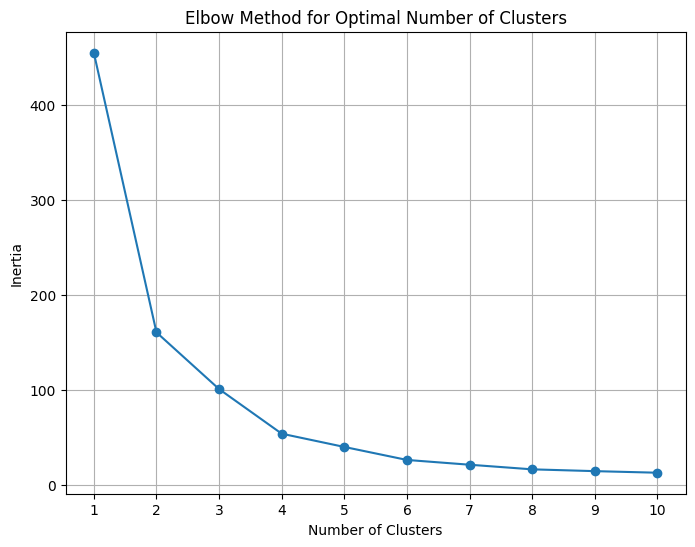

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Menghitung inertia untuk berbagai jumlah cluster
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca_df)
    inertia.append(kmeans.inertia_)

# Menampilkan nilai inertia
for k, inertia_value in enumerate(inertia, start=1):
    print(f"Jumlah Cluster: {k}, Inertia: {inertia_value}")

# Plotting nilai inertia untuk menemukan jumlah cluster optimal
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


# K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Anggota Setiap Cluster (KMeans):
0    522
2    318
1    210
Name: count, dtype: int64
Silhouette Score (KMeans): 0.5793873699390286


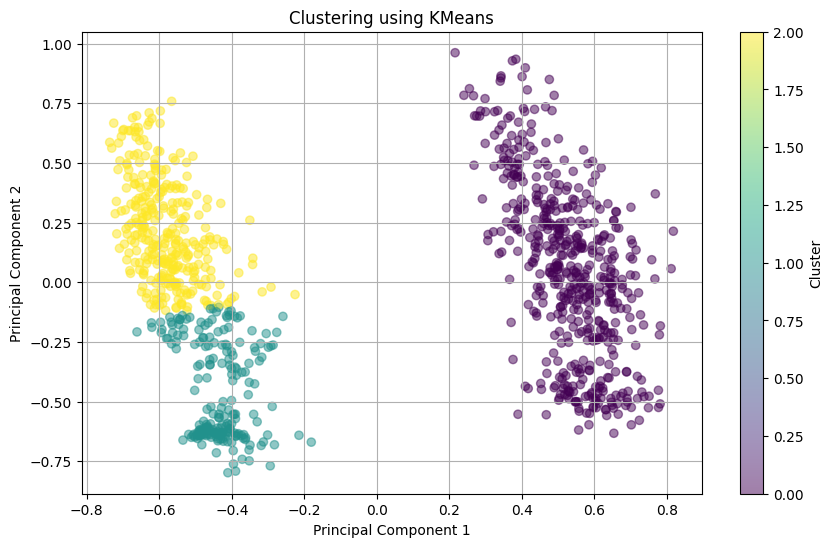

In [ ]:
from sklearn.cluster import KMeans

# Inisialisasi model KMeans dengan jumlah cluster yang dihasilkan dari Elbow Method (3)
kmeans = KMeans(n_clusters=3, random_state=42)

# Melakukan clustering pada data PCA
clusters_kmeans = kmeans.fit_predict(data_pca_df)

# Menampilkan jumlah anggota setiap cluster
print("Jumlah Anggota Setiap Cluster (KMeans):")
print(pd.Series(clusters_kmeans).value_counts())

# Menghitung nilai silhouette score
silhouette_avg_kmeans = silhouette_score(data_pca_df, clusters_kmeans)
print(f"Silhouette Score (KMeans): {silhouette_avg_kmeans}")

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(data_pca_df['PC1'], data_pca_df['PC2'], c=clusters_kmeans, cmap='viridis', alpha=0.5)
plt.title('Clustering using KMeans')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


# MiniBatch K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Jumlah Anggota Setiap Cluster (MiniBatchKMeans):
1    522
2    307
0    221
Name: count, dtype: int64
Silhouette Score (MiniBatchKMeans): 0.5770765504024887


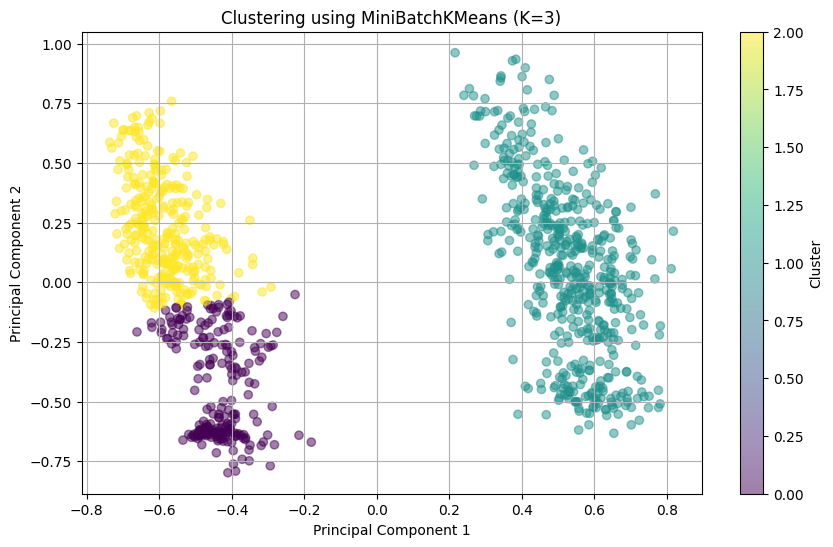

In [ ]:
from sklearn.cluster import MiniBatchKMeans

# Inisialisasi model MiniBatchKMeans dengan jumlah cluster yang telah ditentukan (3)
minibatch_kmeans = MiniBatchKMeans(n_clusters=3, random_state=42)

# Melakukan clustering pada data PCA
clusters_minibatch = minibatch_kmeans.fit_predict(data_pca_df)

# Menampilkan jumlah anggota setiap cluster
print("Jumlah Anggota Setiap Cluster (MiniBatchKMeans):")
print(pd.Series(clusters_minibatch).value_counts())

# Menghitung nilai silhouette score
silhouette_avg_minibatch = silhouette_score(data_pca_df, clusters_minibatch)
print(f"Silhouette Score (MiniBatchKMeans): {silhouette_avg_minibatch}")

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(data_pca_df['PC1'], data_pca_df['PC2'], c=clusters_minibatch, cmap='viridis', alpha=0.5)
plt.title('Clustering using MiniBatchKMeans (K=3)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


# Dbscan

Jumlah Anggota Setiap Cluster (DBSCAN):
0    528
1    522
Name: count, dtype: int64
Silhouette Score (DBSCAN): 0.6103106265839725


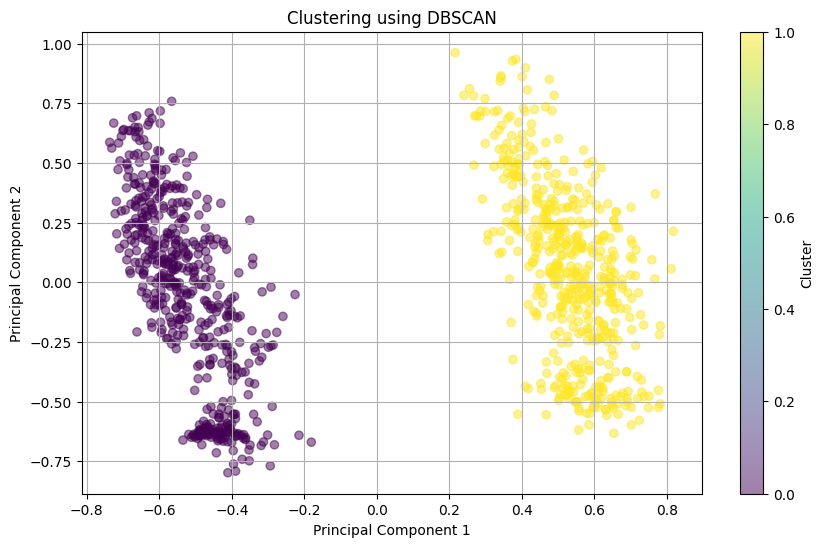

In [ ]:
from sklearn.cluster import DBSCAN

# Inisialisasi model DBSCAN dengan parameter epsilon dan min_samples yang sesuai
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Melakukan clustering pada data PCA
clusters_dbscan = dbscan.fit_predict(data_pca_df)

# Menampilkan jumlah anggota setiap cluster
print("Jumlah Anggota Setiap Cluster (DBSCAN):")
print(pd.Series(clusters_dbscan).value_counts())

# Menghitung nilai silhouette score (mungkin tidak berlaku untuk DBSCAN)
silhouette_avg_dbscan = silhouette_score(data_pca_df, clusters_dbscan)
print(f"Silhouette Score (DBSCAN): {silhouette_avg_dbscan}")

# Visualisasi hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(data_pca_df['PC1'], data_pca_df['PC2'], c=clusters_dbscan, cmap='viridis', alpha=0.5)
plt.title('Clustering using DBSCAN')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


# 12. Evaluasi

In [ ]:
print(f"Silhouette Score (KMeans): {silhouette_avg_kmeans}")
print(f"Silhouette Score (MiniBatchKMeans): {silhouette_avg_minibatch}")
print(f"Silhouette Score (DBSCAN): {silhouette_avg_dbscan}")


Silhouette Score (KMeans): 0.5793873699390286
Silhouette Score (MiniBatchKMeans): 0.5770765504024887
Silhouette Score (DBSCAN): 0.6103106265839725


<ipython-input-50-c003a02001a3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=cluster_df, x='Cluster', palette='viridis')


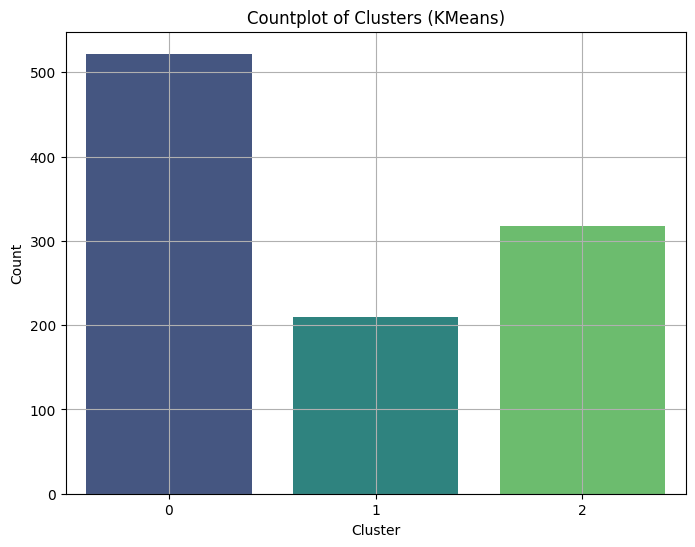

In [ ]:
import seaborn as sns

# Membuat DataFrame dari hasil clustering
cluster_df = pd.DataFrame({'Cluster': clusters_kmeans})

# Plotting countplot dari hasil clustering
plt.figure(figsize=(8, 6))
sns.countplot(data=cluster_df, x='Cluster', palette='viridis')
plt.title('Countplot of Clusters (KMeans)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(True)
plt.show()


# 13. Interpretasi

# K-Means

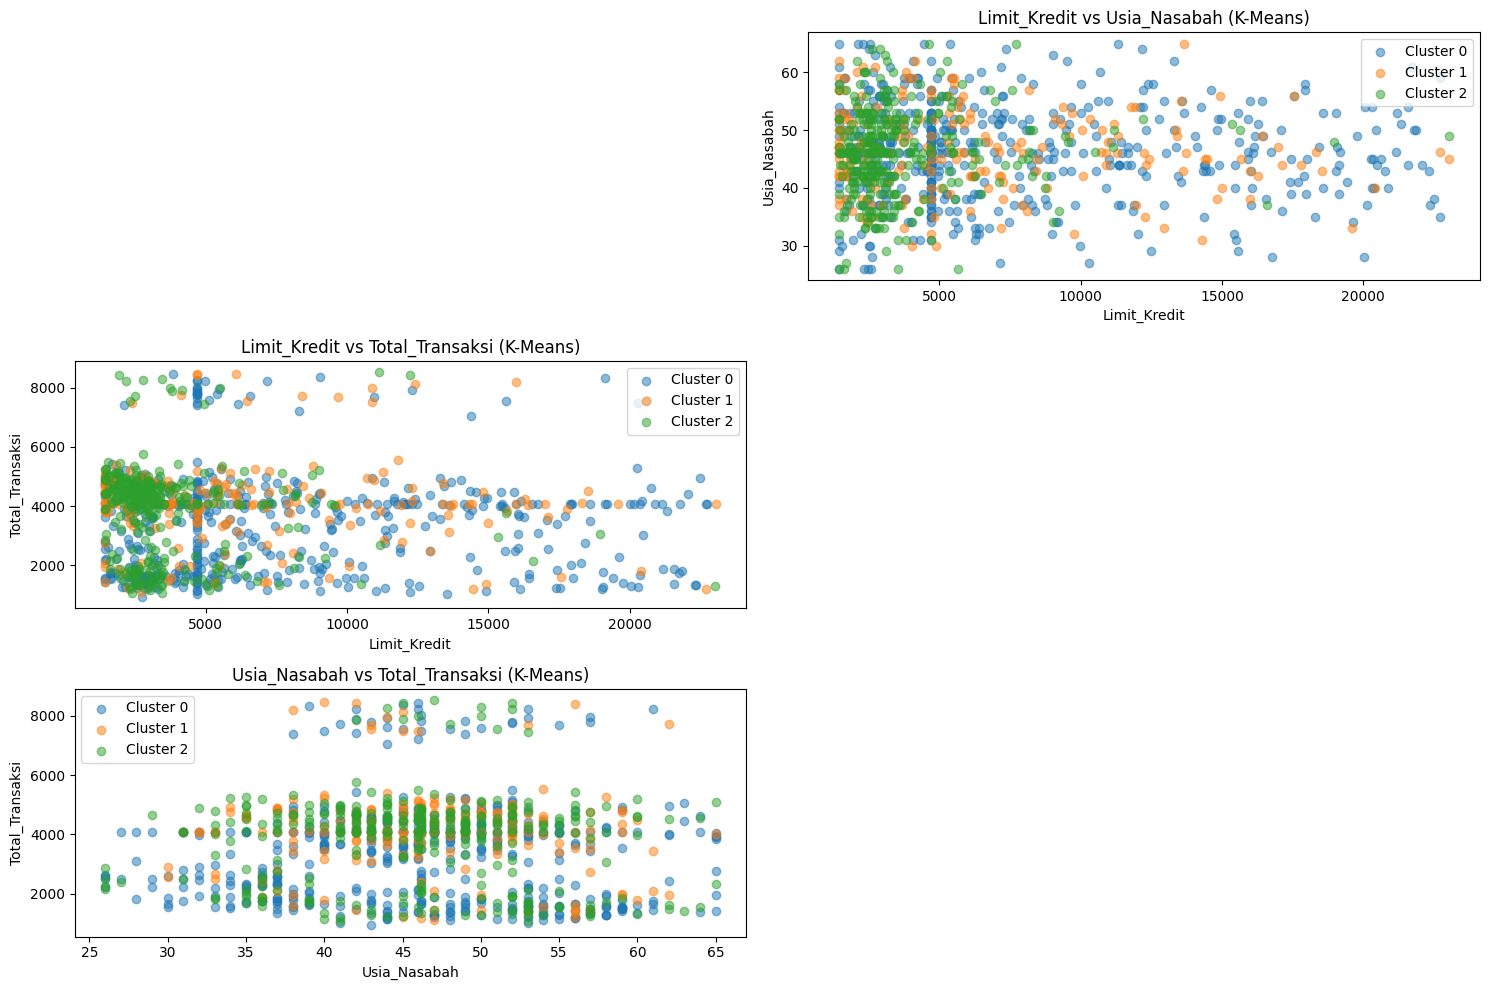

In [ ]:
import matplotlib.pyplot as plt

# Fitur-fitur utama untuk interpretasi
features = ['Limit_Kredit', 'Usia_Nasabah', 'Total_Transaksi']

# Visualisasi scatter plot untuk setiap pasangan fitur
plt.figure(figsize=(15, 10))
for i, feature1 in enumerate(features):
    for j, feature2 in enumerate(features):
        if i < j:
            plt.subplot(3, 2, (i*2)+j+1)
            for cluster in range(3):
                plt.scatter(data[clusters_kmeans == cluster][feature1], data[clusters_kmeans == cluster][feature2], label=f'Cluster {cluster}', alpha=0.5)
            plt.title(f'{feature1} vs {feature2} (K-Means)')
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.legend()
plt.tight_layout()
plt.show()


# MiniBatch K-Means

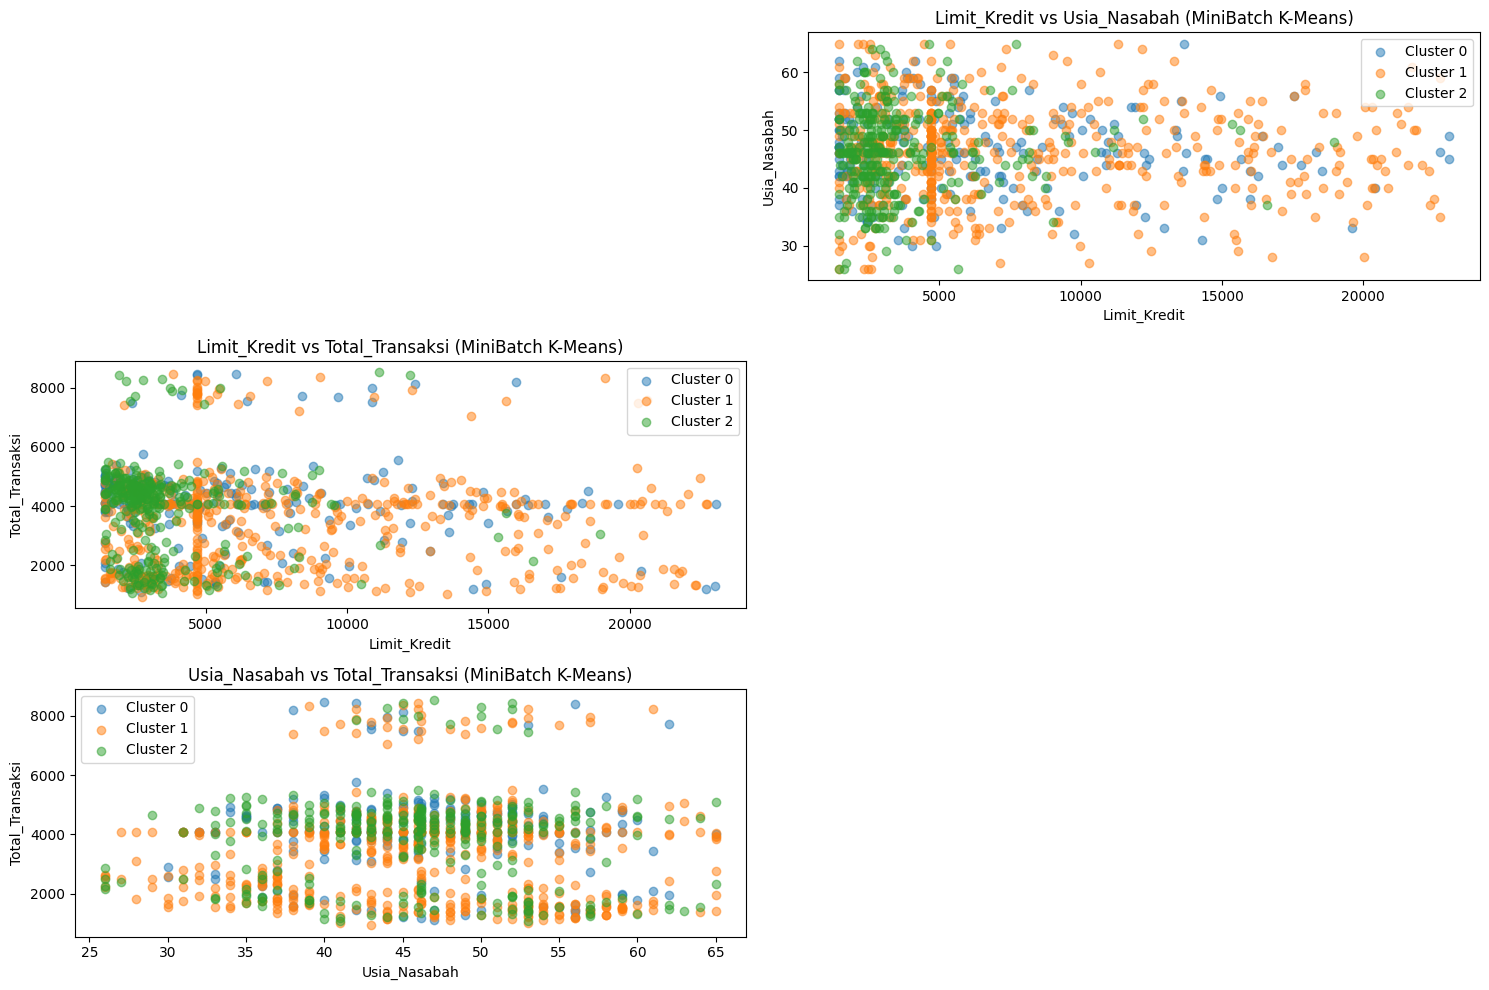

In [ ]:
# Visualisasi scatter plot untuk setiap pasangan fitur
plt.figure(figsize=(15, 10))
for i, feature1 in enumerate(features):
    for j, feature2 in enumerate(features):
        if i < j:
            plt.subplot(3, 2, (i*2)+j+1)
            for cluster in range(3):
                plt.scatter(data[clusters_minibatch == cluster][feature1], data[clusters_minibatch == cluster][feature2], label=f'Cluster {cluster}', alpha=0.5)
            plt.title(f'{feature1} vs {feature2} (MiniBatch K-Means)')
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.legend()
plt.tight_layout()
plt.show()


Jumlah Anggota Setiap Cluster (DBSCAN):
0    528
1    522
Name: count, dtype: int64
Silhouette Score (DBSCAN): 0.6103106265839725


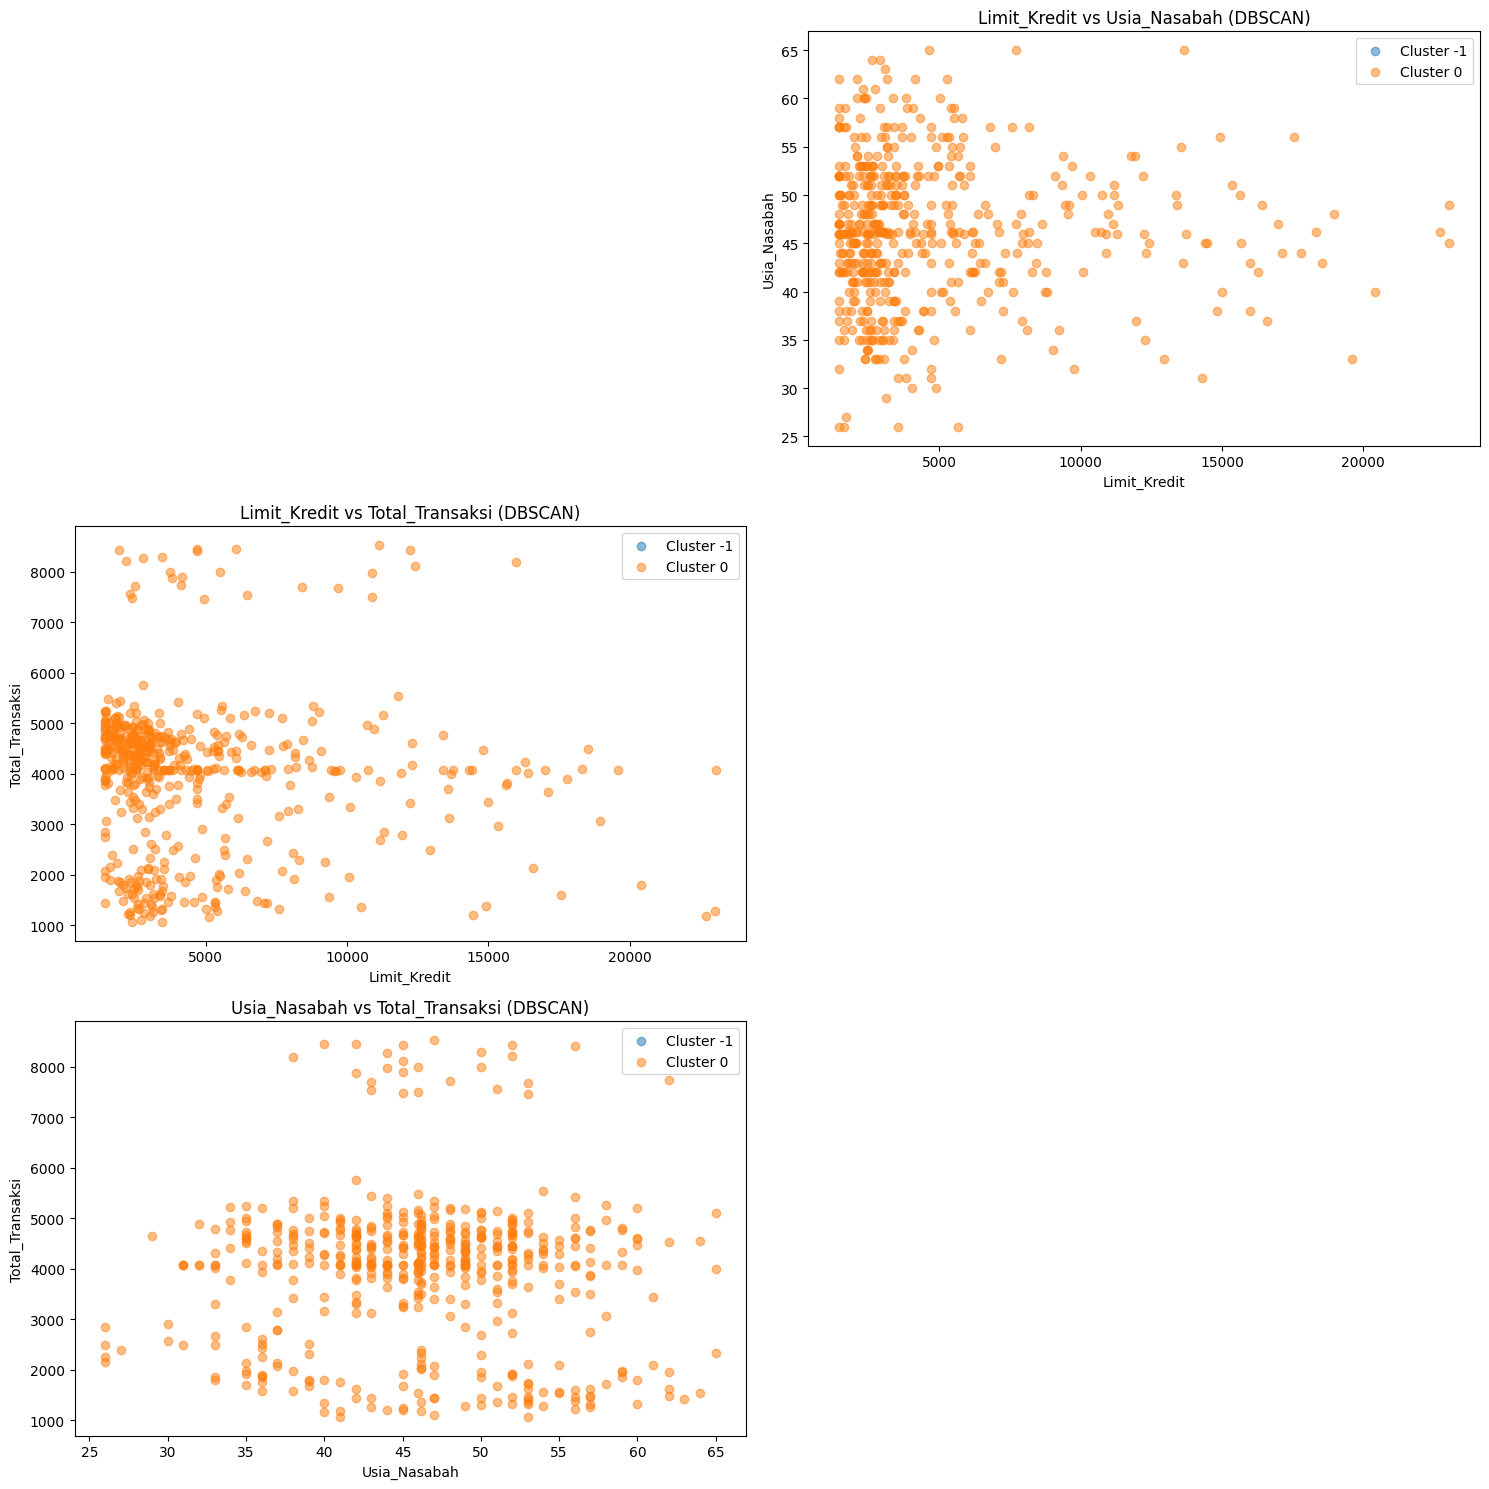

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import pandas as pd

# Inisialisasi model DBSCAN dengan parameter epsilon dan min_samples yang sesuai
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Melakukan clustering pada data PCA
clusters_dbscan = dbscan.fit_predict(data_pca_df)

# Menampilkan jumlah anggota setiap cluster
print("Jumlah Anggota Setiap Cluster (DBSCAN):")
print(pd.Series(clusters_dbscan).value_counts())

# Menghitung nilai silhouette score (mungkin tidak berlaku untuk DBSCAN)
silhouette_avg_dbscan = silhouette_score(data_pca_df, clusters_dbscan)
print(f"Silhouette Score (DBSCAN): {silhouette_avg_dbscan}")

# Menambahkan hasil clustering ke dataframe asli
data['DBSCAN_Cluster'] = clusters_dbscan

# Fitur-fitur utama untuk interpretasi
features = ['Limit_Kredit', 'Usia_Nasabah', 'Total_Transaksi']

# Visualisasi scatter plot untuk setiap pasangan fitur
plt.figure(figsize=(15, 15))
for i, feature1 in enumerate(features):
    for j, feature2 in enumerate(features):
        if i < j:
            plt.subplot(3, 2, (i*2)+j+1)
            for cluster in range(-1, len(set(clusters_dbscan)) - 1):
                plt.scatter(data[data['DBSCAN_Cluster'] == cluster][feature1],
                            data[data['DBSCAN_Cluster'] == cluster][feature2],
                            label=f'Cluster {cluster}', alpha=0.5)
            plt.title(f'{feature1} vs {feature2} (DBSCAN)')
            plt.xlabel(feature1)
            plt.ylabel(feature2)
            plt.legend()
plt.tight_layout()
plt.show()


1. K-Means:
- Cluster 0: Dapat dilihat bahwa nasabah dalam cluster ini cenderung memiliki batas kredit yang rendah, usia yang relatif muda, dan total transaksi yang juga rendah.

- Cluster 1: Nasabah dalam cluster ini memiliki batas kredit yang sedang hingga tinggi, usia yang bervariasi, dan total transaksi yang lebih tinggi daripada cluster 0.

- Cluster 2: Cluster ini mungkin mewakili nasabah dengan batas kredit yang sangat tinggi, usia yang lebih tua, dan total transaksi yang tinggi pula.

2. MiniBatch K-Means:
- Cluster 0: Mirip dengan K-Means, nasabah dalam cluster ini cenderung memiliki batas kredit yang rendah, usia yang relatif muda, dan total transaksi yang juga rendah.

- Cluster 1: Nasabah dalam cluster ini memiliki batas kredit yang sedang hingga tinggi, usia yang bervariasi, dan total transaksi yang lebih tinggi daripada cluster 0.

- Cluster 2: Cluster ini mungkin mewakili nasabah dengan batas kredit yang sangat tinggi, usia yang lebih tua, dan total transaksi yang tinggi pula.

3. Dbscan
- Cluster -1 (Outliers): DBSCAN mengidentifikasi beberapa data poin sebagai outliers, yang berarti mereka tidak cocok dengan pola umum yang ditemukan di kluster lain. Outliers ini menunjukkan variasi yang sangat besar dalam usia, limit kredit, dan total transaksi.

- Cluster 0: Menunjukkan nasabah dengan variasi usia dan transaksi tetapi cenderung memiliki limit kredit yang lebih rendah.

- Cluster 1: Menunjukkan nasabah dengan limit kredit yang lebih tinggi dan transaksi yang lebih tinggi, menunjukkan nasabah yang mungkin lebih mapan secara finansial dan mungkin lebih tua.